# Sandbox

In [1]:
import numpy as np
%matplotlib inline
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)


print(pca.explained_variance_ratio_)  

print(pca.singular_values_) 

[0.99244289 0.00755711]
[6.30061232 0.54980396]


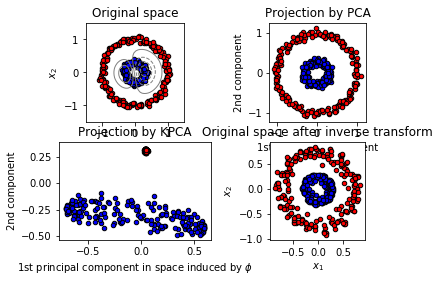

In [2]:
# Authors: Mathieu Blondel
#          Andreas Mueller
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

np.random.seed(0)

X, y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [3]:
def logSpiral(a, b, deltaTheta=0):
    return lambda t: np.transpose(np.concatenate((
        (a*np.cos(t+deltaTheta)*np.exp(b*t)).reshape(1, -1),
        (a*np.sin(t+deltaTheta)*np.exp(b*t)).reshape(1, -1)
    )))

sFunc1 = logSpiral(1, 0.2)
sFunc2 = logSpiral(1, 0.2, deltaTheta=np.pi)
spiral1 = sFunc1(np.arange(0.1, 4*np.pi, 0.05))
spiral2 = sFunc2(np.arange(0.1, 4*np.pi, 0.05))

shuffle the spiral (in-place)

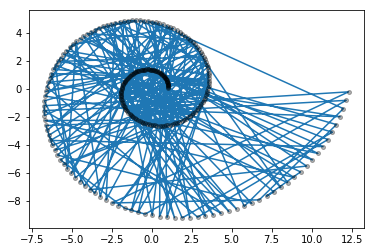

In [4]:
np.random.shuffle(spiral1)

plt.plot(spiral1[:, 0], spiral1[:, 1])
plt.plot(spiral1[:, 0], spiral1[:, 1], 'k.', markersize=8, alpha=0.3)

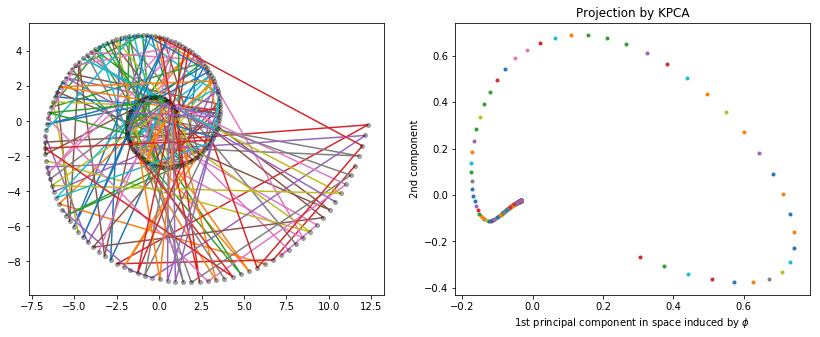

In [5]:
kpca = KernelPCA(kernel="rbf", gamma=10)
X_kpca = kpca.fit_transform(spiral1)
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
for i in range(int(spiral1.shape[0] / 10)):
    ax[0].plot(spiral1[10*i:10*i+10, 0], spiral1[10*i:10*i+10, 1])
    ax[0].plot(spiral1[10*i:10*i+10, 0], spiral1[10*i:10*i+10, 1], 'k.', markersize=8, alpha=0.3)
for i in range(int(spiral1.shape[0] / 10)):
    ax[1].plot(X_kpca[10*i:10*i+10, 0], X_kpca[10*i:10*i+10, 1], '.')
ax[1].set_title("Projection by KPCA")
ax[1].set_xlabel("1st principal component in space induced by $\phi$")
ax[1].set_ylabel("2nd component")

In [6]:
pca = PCA(n_components=2)
mask = np.random.randn(spiral1.shape[0])>0
keyPoints = spiral1[mask]

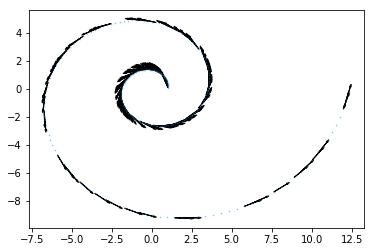

In [7]:
foo = []
fig, ax = plt.subplots(ncols=1)
ax.plot(spiral1[:, 0], spiral1[:, 1], '.', markersize=1, alpha=0.5)
for point in keyPoints:
    ax.plot(point[0], point[1], 'r', markersize=10, alpha=0.5)
    radialMask = (spiral1[:, 0] - point[0])**2 + (spiral1[:, 1] - point[1])**2 < 1
    bar = pca.fit(spiral1[radialMask])
    foo.append(bar)
    ax.arrow(point[0], point[1], bar.components_[0][0], bar.components_[0][1], head_width=0.1, head_length=0.2, fc='k', ec='k')

In [8]:
from scipy.optimize import leastsq
t = np.arange(0.1, 4*np.pi, 0.1)

def logSpiral(a, b, c):
    return np.transpose(np.concatenate((
        (a * np.cos(t + c) * np.exp(b * t)).reshape(1, -1),
        (a * np.sin(t + c) * np.exp(b * t)).reshape(1, -1)
    )))

def differenceCalc(p):
    a, b, c = p
    res = logSpiral(a, b, c);
    return np.add.reduce((spiral1 - res)**2, axis=1)

print(differenceCalc([1, 0.2, 0]))
params = leastsq(differenceCalc, [1, 0.1, 0])

ValueError: operands could not be broadcast together with shapes (250,2) (1247,2) 

In [ ]:
fittedSpiral = logSpiral(*params[0])
plt.plot(fittedSpiral[:, 0], fittedSpiral[:, 1])
plt.plot(spiral1[:, 0], spiral1[:, 1])